In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
%matplotlib inline
import numpy as np

In [4]:
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present (1).csv',low_memory = False)

In [3]:
crime_data.head(5)

DR_NO               Date Rptd                DATE OCC TIME OCC AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM     2230    3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM      330    1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM     1200    1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM     1730   15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      415   19   

     AREA NAME Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest         377       2.0   624.0   
1      Central         163       2.0   624.0   
2      Central         155       2.0   845.0   
3  N Hollywood        1543       2.0   745.0   
4      Mission        1998       2.0   740.0   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192076 entries, 0 to 192075
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           192076 non-null  int64  
 1   Date Rptd       192076 non-null  object 
 2   DATE OCC        192076 non-null  object 
 3   TIME OCC        192076 non-null  object 
 4   AREA            192076 non-null  object 
 5   AREA NAME       192076 non-null  object 
 6   Rpt Dist No     192076 non-null  object 
 7   Part 1-2        192075 non-null  float64
 8   Crm Cd          192075 non-null  float64
 9   Crm Cd Desc     192076 non-null  object 
 10  Mocodes         166301 non-null  object 
 11  Vict Age        192076 non-null  int64  
 12  Vict Sex        167470 non-null  object 
 13  Vict Descent    167467 non-null  object 
 14  Premis Cd       192073 non-null  float64
 15  Premis Desc     192010 non-null  object 
 16  Weapon Used Cd  70077 non-null   float64
 17  Weapon Des

In [5]:
crime_data.describe()

DR_NO       Part 1-2         Crm Cd       Vict Age  \
count  1.920760e+05  192075.000000  192075.000000  192076.000000   
mean   2.015336e+08       1.417878     509.446487      30.099414   
std    2.514481e+06       0.493211     209.716717      21.769262   
min    8.170000e+02       1.000000     110.000000      -2.000000   
25%    2.006062e+08       1.000000     330.000000      12.000000   
50%    2.011135e+08       1.000000     510.000000      31.000000   
75%    2.017099e+08       2.000000     626.000000      46.000000   
max    2.321075e+08       2.000000     956.000000     354.000000   

           Premis Cd  Weapon Used Cd       Crm Cd 1      Crm Cd 2    Crm Cd 3  \
count  192073.000000    70077.000000  192073.000000  15712.000000  548.000000   
mean      295.954137      365.096380     509.155514    952.158859  983.779197   
std       212.572493      121.130033     209.492516    119.814884   49.990644   
min       101.000000      101.000000       2.000000    210.000000  626.000000   
25%       101.000000      311.000000     330.000000    998.000000  998.000000   
50%       203.000000      400.000000     510.000000    998.000000  998.000000   
75%       501.000000      400.000000     626.000000    998.000000  998.000000   
max       971.000000      516.000000     956.000000    999.000000  998.000000   

         Crm Cd 4            LAT            LON  
count   17.000000  192074.000000  192074.000000  
mean   983.588235      33.939405    -117.890595  
std     45.015357       2.132224       7.396735  
min    821.000000       0.000000    -118.667600  
25%    998.000000      34.012400    -118.432500  
50%    998.000000      34.058800    -118.321100  
75%    998.000000      34.164900    -118.274000  
max    998.000000      34.329300       0.000000

In [7]:
crime_data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               1
Crm Cd                 1
Crm Cd Desc            0
Mocodes            25775
Vict Age               0
Vict Sex           24606
Vict Descent       24609
Premis Cd              3
Premis Desc           66
Weapon Used Cd    121999
Weapon Desc       121998
Status                 0
Status Desc            1
Crm Cd 1               3
Crm Cd 2          176364
Crm Cd 3          191528
Crm Cd 4          192059
LOCATION               2
Cross Street      158341
LAT                    2
LON                    2
dtype: int64

In [8]:
crime_data.dropna()

DR_NO               Date Rptd                DATE OCC TIME OCC  \
52073   200613424  08/02/2020 12:00:00 AM  08/02/2020 12:00:00 AM     2030   
126178  201904032  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM     2135   
130271  201904032  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM     2135   

       AREA  AREA NAME Rpt Dist No  Part 1-2  Crm Cd      Crm Cd Desc  ...  \
52073    06  Hollywood        0657       1.0   761.0  BRANDISH WEAPON  ...   
126178   19    Mission        1924       1.0   761.0  BRANDISH WEAPON  ...   
130271   19    Mission        1924       1.0   761.0  BRANDISH WEAPON  ...   

       Status   Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
52073      AO   Adult Other    761.0    920.0     930.0    998.0   
126178     AA  Adult Arrest    761.0    930.0     997.0    998.0   
130271     AA  Adult Arrest    761.0    930.0     997.0    998.0   

                               LOCATION                     Cross Street  \
52073                           WESTERN                          ROMAINE   
126178  ASTORIA                      ST  SAN FERNANDO                 RD   
130271  ASTORIA                      ST  SAN FERNANDO                 RD   

            LAT       LON  
52073   34.0885 -118.3092  
126178  34.2949 -118.4571  
130271  34.2949 -118.4571  

[3 rows x 28 columns]

In [10]:
crime_data.fillna(0,inplace = True)

In [11]:
crime_data.corr()

<ipython-input-11-74c12aeae2fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crime_data.corr()


DR_NO  Part 1-2    Crm Cd  Vict Age  Premis Cd  \
DR_NO           1.000000  0.064089 -0.031887  0.033022   0.089341   
Part 1-2        0.064089  1.000000  0.736035  0.178688   0.251108   
Crm Cd         -0.031887  0.736035  1.000000 -0.009910   0.124566   
Vict Age        0.033022  0.178688 -0.009910  1.000000   0.182731   
Premis Cd       0.089341  0.251108  0.124566  0.182731   1.000000   
Weapon Used Cd -0.066070  0.291090  0.102217  0.157975   0.103723   
Crm Cd 1       -0.031960  0.736599  0.999134 -0.009757   0.124356   
Crm Cd 2       -0.021819 -0.065752 -0.058858 -0.004086  -0.000492   
Crm Cd 3        0.001823 -0.032082  0.007812  0.001788   0.010503   
Crm Cd 4       -0.001489 -0.007963  0.004392  0.002900   0.002446   
LAT             0.001332 -0.036374 -0.049807 -0.001009  -0.011888   
LON             0.002097  0.036655  0.049935  0.001968   0.012296   

                Weapon Used Cd  Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4  \
DR_NO                -0.066070 -0.031960 -0.021819  0.001823 -0.001489   
Part 1-2              0.291090  0.736599 -0.065752 -0.032082 -0.007963   
Crm Cd                0.102217  0.999134 -0.058858  0.007812  0.004392   
Vict Age              0.157975 -0.009757 -0.004086  0.001788  0.002900   
Premis Cd             0.103723  0.124356 -0.000492  0.010503  0.002446   
Weapon Used Cd        1.000000  0.100697  0.079468  0.044269  0.005452   
Crm Cd 1              0.100697  1.000000 -0.062751  0.004370  0.001579   
Crm Cd 2              0.079468 -0.062751  1.000000  0.146366  0.023785   
Crm Cd 3              0.044269  0.004370  0.146366  1.000000  0.163757   
Crm Cd 4              0.005452  0.001579  0.023785  0.163757  1.000000   
LAT                  -0.005387 -0.049863 -0.004318  0.003947  0.000832   
LON                   0.003516  0.049993  0.004787 -0.003390 -0.000569   

                     LAT       LON  
DR_NO           0.001332  0.002097  
Part 1-2       -0.036374  0.036655  
Crm Cd         -0.049807  0.049935  
Vict Age       -0.001009  0.001968  
Premis Cd      -0.011888  0.012296  
Weapon Used Cd -0.005387  0.003516  
Crm Cd 1       -0.049863  0.049993  
Crm Cd 2       -0.004318  0.004787  
Crm Cd 3        0.003947 -0.003390  
Crm Cd 4        0.000832 -0.000569  
LAT             1.000000 -0.998929  
LON            -0.998929  1.000000

from matplotlib import pyplot as plt
_df_0['DR_NO'].plot(kind='hist', bins=20, title='DR_NO')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Part 1-2'].plot(kind='hist', bins=20, title='Part 1-2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Crm Cd'].plot(kind='hist', bins=20, title='Crm Cd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Vict Age'].plot(kind='hist', bins=20, title='Vict Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='DR_NO', y='Part 1-2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Part 1-2', y='Crm Cd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Crm Cd', y='Vict Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Vict Age', y='Premis Cd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['DR_NO'].plot(kind='line', figsize=(8, 4), title='DR_NO')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Part 1-2'].plot(kind='line', figsize=(8, 4), title='Part 1-2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Crm Cd'].plot(kind='line', figsize=(8, 4), title='Crm Cd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Vict Age'].plot(kind='line', figsize=(8, 4), title='Vict Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [13]:
Vict_Age = pd.DataFrame(crime_data['Vict Age'])

In [14]:
Vict_Age.describe()

Vict Age
count  192076.000000
mean       30.099414
std        21.769262
min        -2.000000
25%        12.000000
50%        31.000000
75%        46.000000
max       354.000000

In [38]:
Vict_Age.value_counts().head()

Vict Age
0           148304
30           14227
35           13797
29           13547
31           13475
dtype: int64

<Axes: >

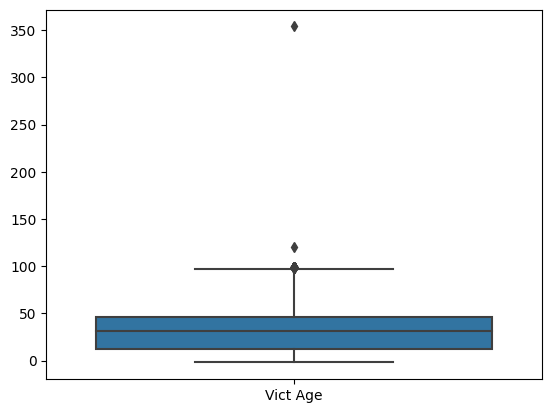

In [15]:
sns.boxplot(data=Vict_Age)

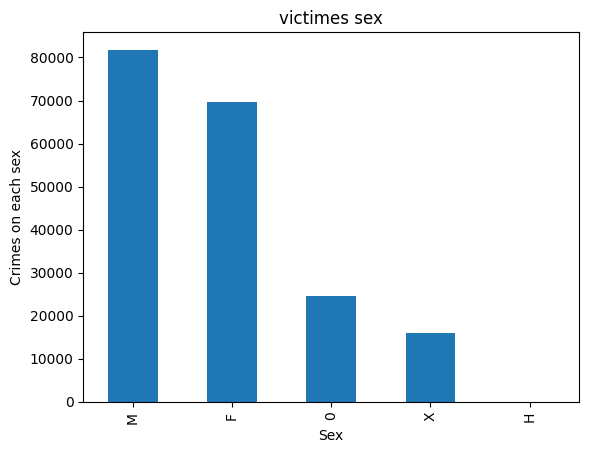

In [22]:
crime_data['Vict Sex'].value_counts().plot(kind='bar')
plt.title('victimes sex')
plt.xlabel('Sex')
plt.ylabel('Crimes on each sex')
plt.show()

<Axes: xlabel='Vict Age', ylabel='Vict Sex'>

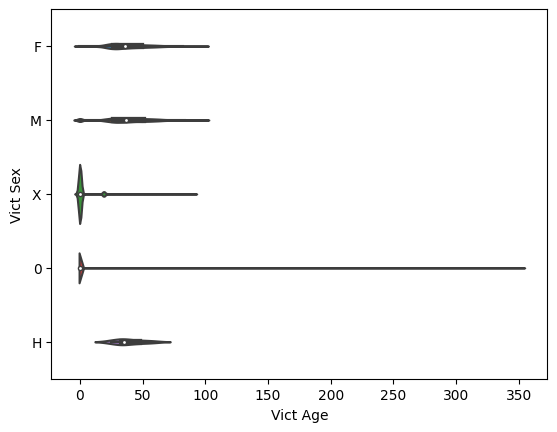

In [17]:
sns.violinplot(data=crime_data, x ='Vict Age',y='Vict Sex')

In [40]:
crime_data[crime_data['Vict Age'] == -2]['Crm Cd Desc']

18071             SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
20865                                     THEFT OF IDENTITY
198819                                    THEFT OF IDENTITY
198825                            OTHER MISCELLANEOUS CRIME
198906    THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
198970            SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
199068                                             BURGLARY
199097               CRIMINAL THREATS - NO WEAPON DISPLAYED
199145                                    THEFT OF IDENTITY
199267             SHOPLIFTING - PETTY THEFT ($950 & UNDER)
199397                                     VEHICLE - STOLEN
205517            SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
315905    SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...
Name: Crm Cd Desc, dtype: object

In [41]:
Vict_sex = pd.DataFrame(crime_data['Vict Sex'])

In [42]:
Vict_sex

Vict Sex
0             F
1             M
2             X
3             F
4             X
...         ...
615340        F
615341        F
615342        F
615343        M
615344        F

[615345 rows x 1 columns]

In [14]:
Vict_sex.value_counts().head()

Vict Sex
M           256856
F           227717
X            50191
H               70
dtype: int64

In [15]:
AREA_NAME = pd.DataFrame(crime_data['AREA NAME'])

In [16]:
AREA_NAME.value_counts().head()

AREA NAME  
Central        40377
77th Street    39135
Pacific        35950
Southwest      34336
Hollywood      33215
dtype: int64

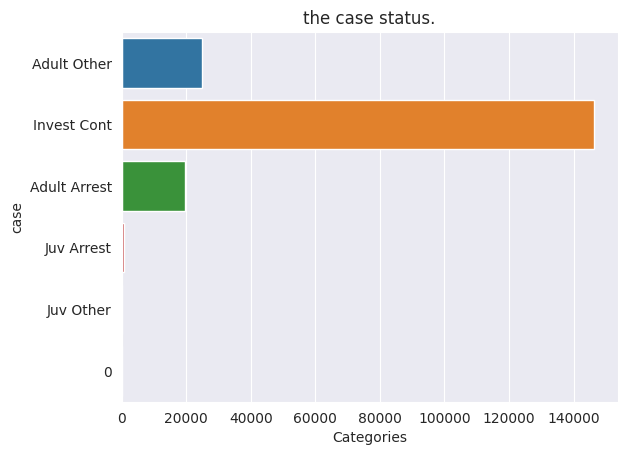

In [28]:
sns.set_style('darkgrid')
sns.countplot(y = 'Status Desc', data=crime_data)
plt.title('the case status.')
plt.xlabel('Categories')
plt.ylabel('case')
plt.show()


<Axes: xlabel='Status Desc', ylabel='Vict Age'>

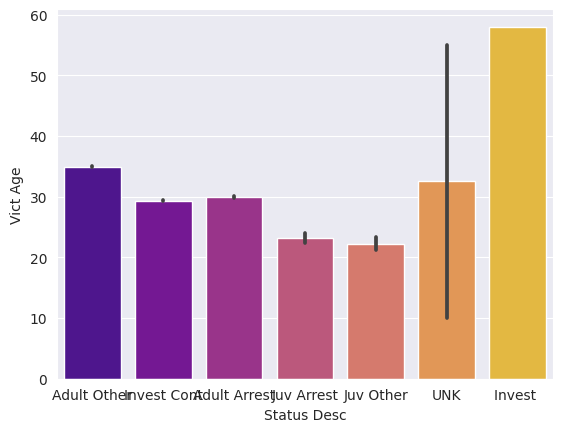

In [18]:
sns.set_style('darkgrid')
sns.barplot(x ='Status Desc', y ='Vict Age', data = crime_data.reset_index(), palette ='plasma')

In [44]:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

In [46]:
crime_data['Month_Rptd'] = crime_data['Date Rptd'].dt.month
crime_data['Month_OCC'] = crime_data['DATE OCC'].dt.month

<Axes: xlabel='Month_OCC', ylabel='Month_Rptd'>

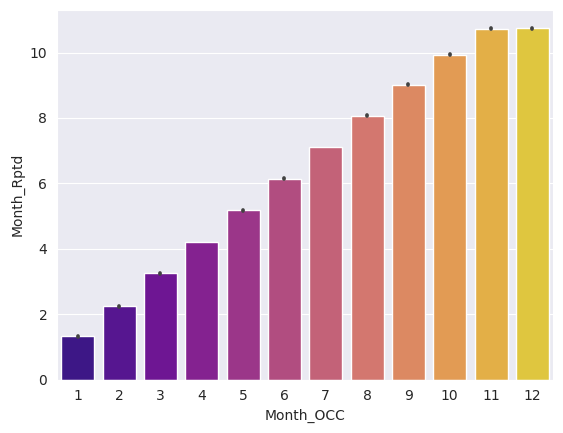

In [47]:
sns.set_style('darkgrid')
sns.barplot(x ='Month_OCC', y ='Month_Rptd', data = crime_data.reset_index(), palette ='plasma')

<Axes: xlabel='count', ylabel='Status Desc'>

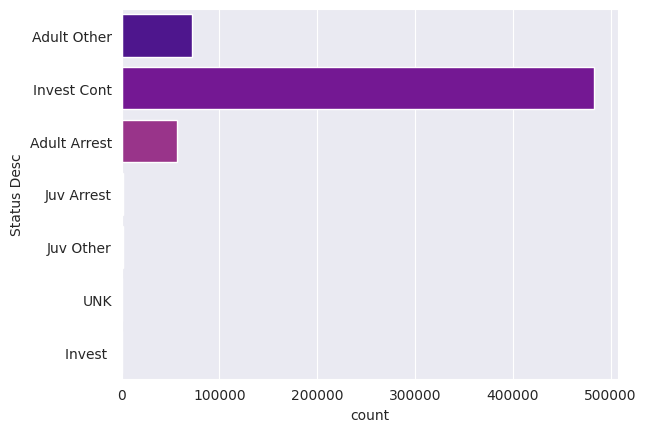

In [20]:
sns.countplot(y ='Status Desc', data =  crime_data.reset_index(),
			palette ='plasma')

<Axes: xlabel='count', ylabel='AREA NAME'>

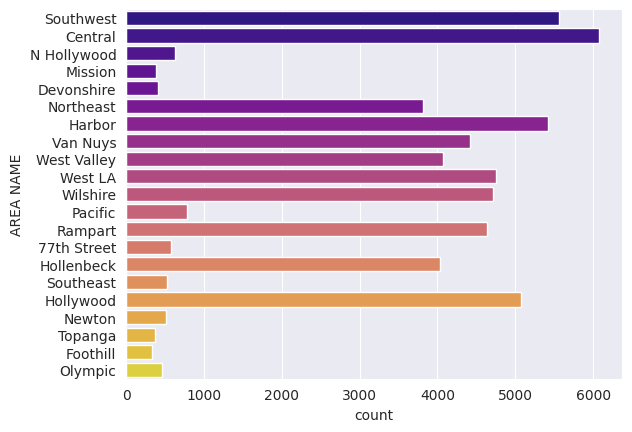

In [ ]:
sns.countplot(y ='AREA NAME', data =  crime_data.reset_index(),
			palette ='plasma')

<Axes: xlabel='Weapon Used Cd', ylabel='Status Desc'>

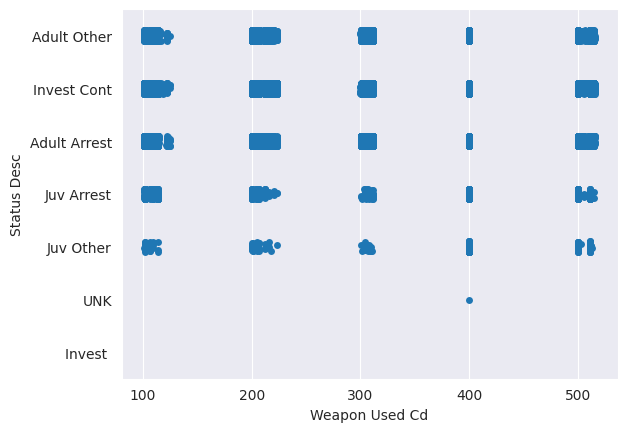

In [21]:
sns.stripplot(x ='Weapon Used Cd', y ='Status Desc', data = crime_data.reset_index(),
			jitter = True, dodge = True)

In [22]:
crime_data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

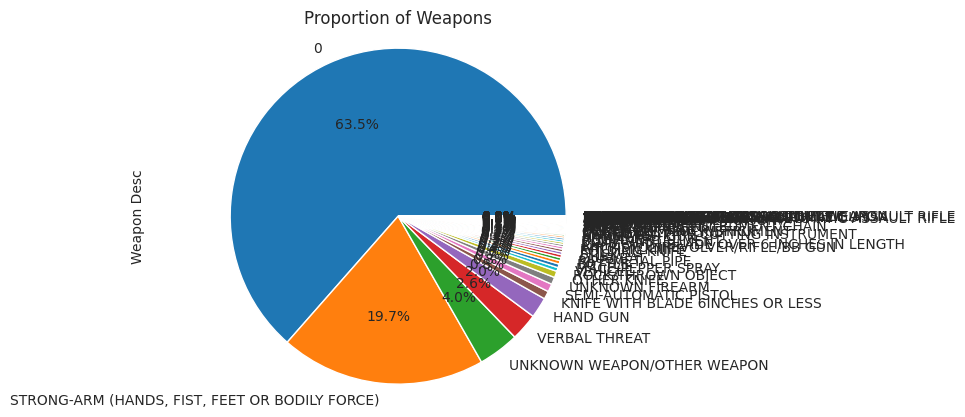

In [30]:
# Using Pandas plotting
crime_data['Weapon Desc'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Weapons')
plt.show()


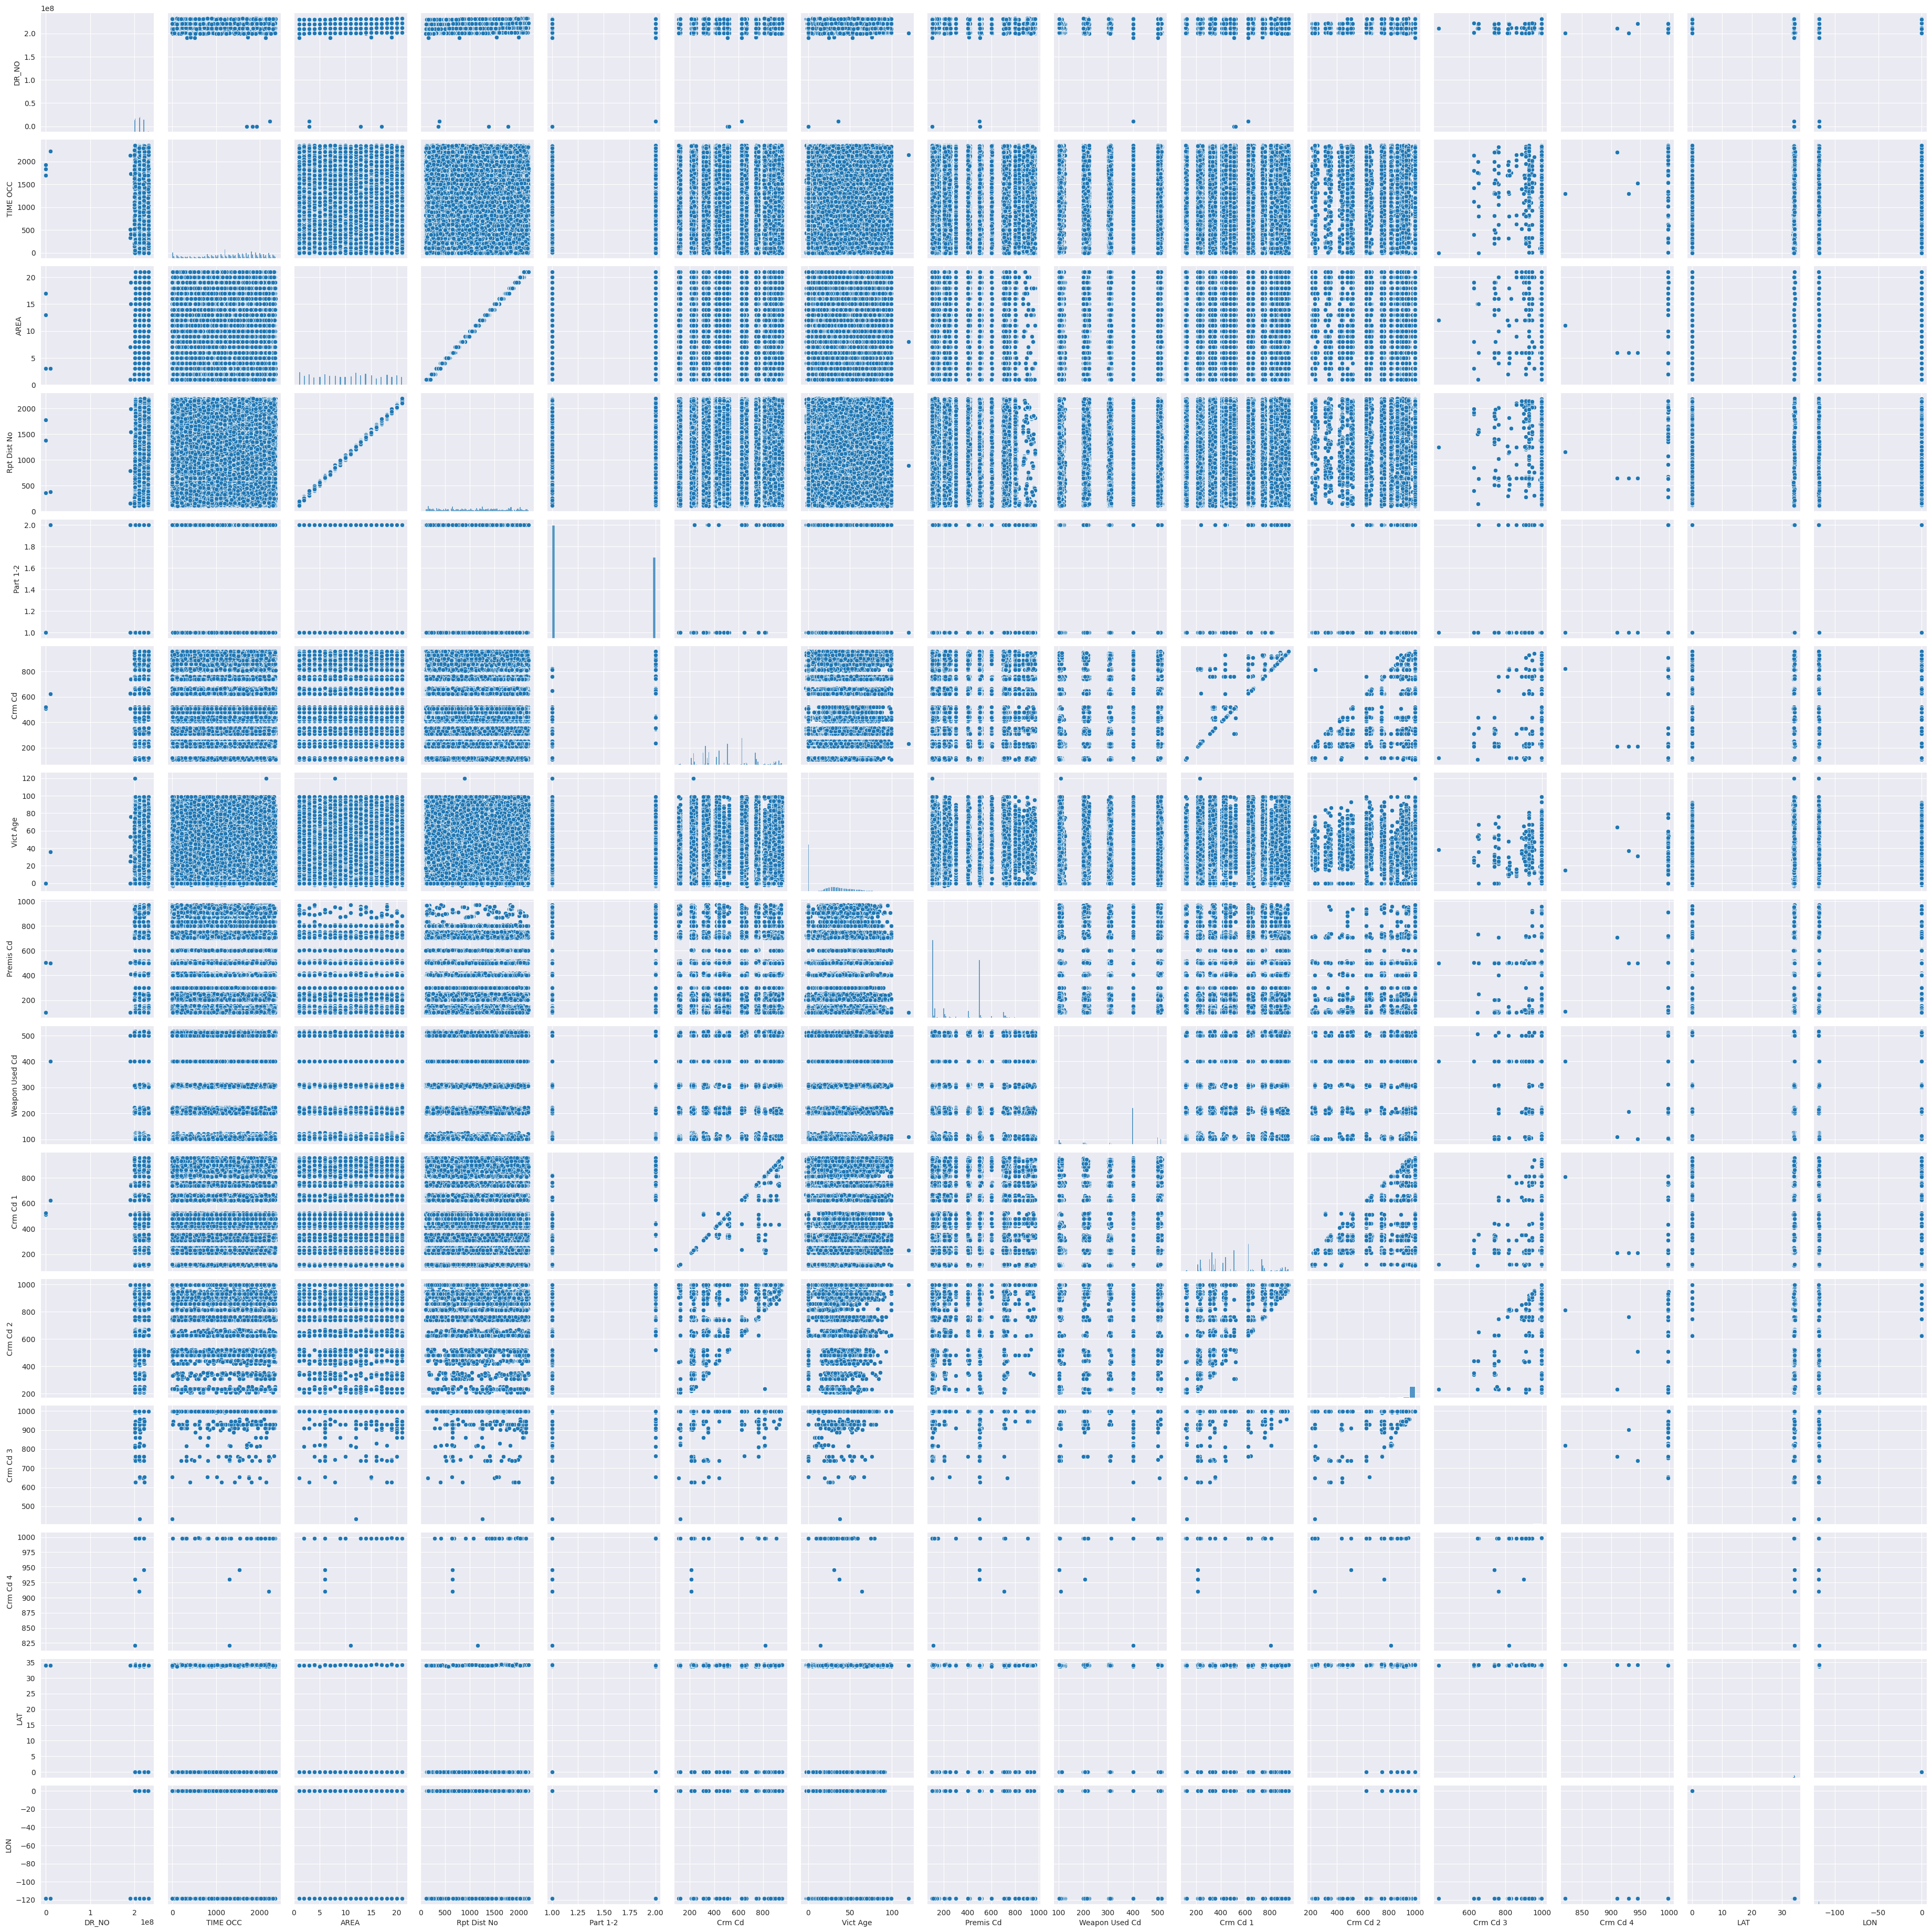

In [23]:
sns.pairplot(crime_data)

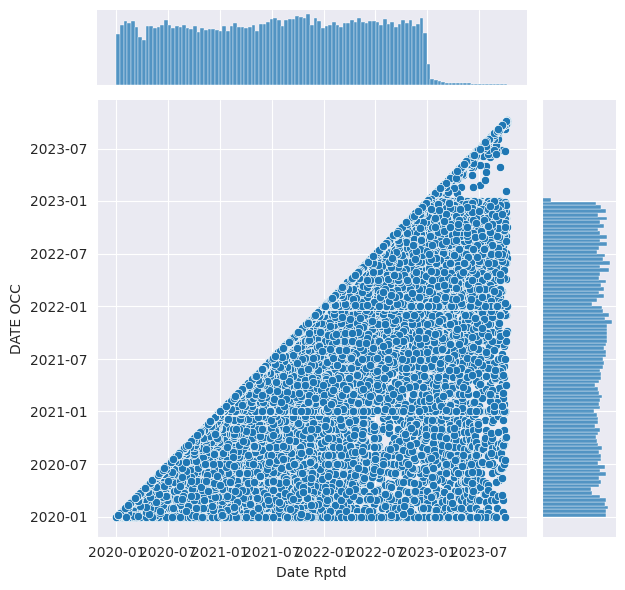

In [53]:
g = sns.JointGrid(data=crime_data.reset_index(), x="Date Rptd", y="DATE OCC")
g.plot(sns.scatterplot, sns.histplot)

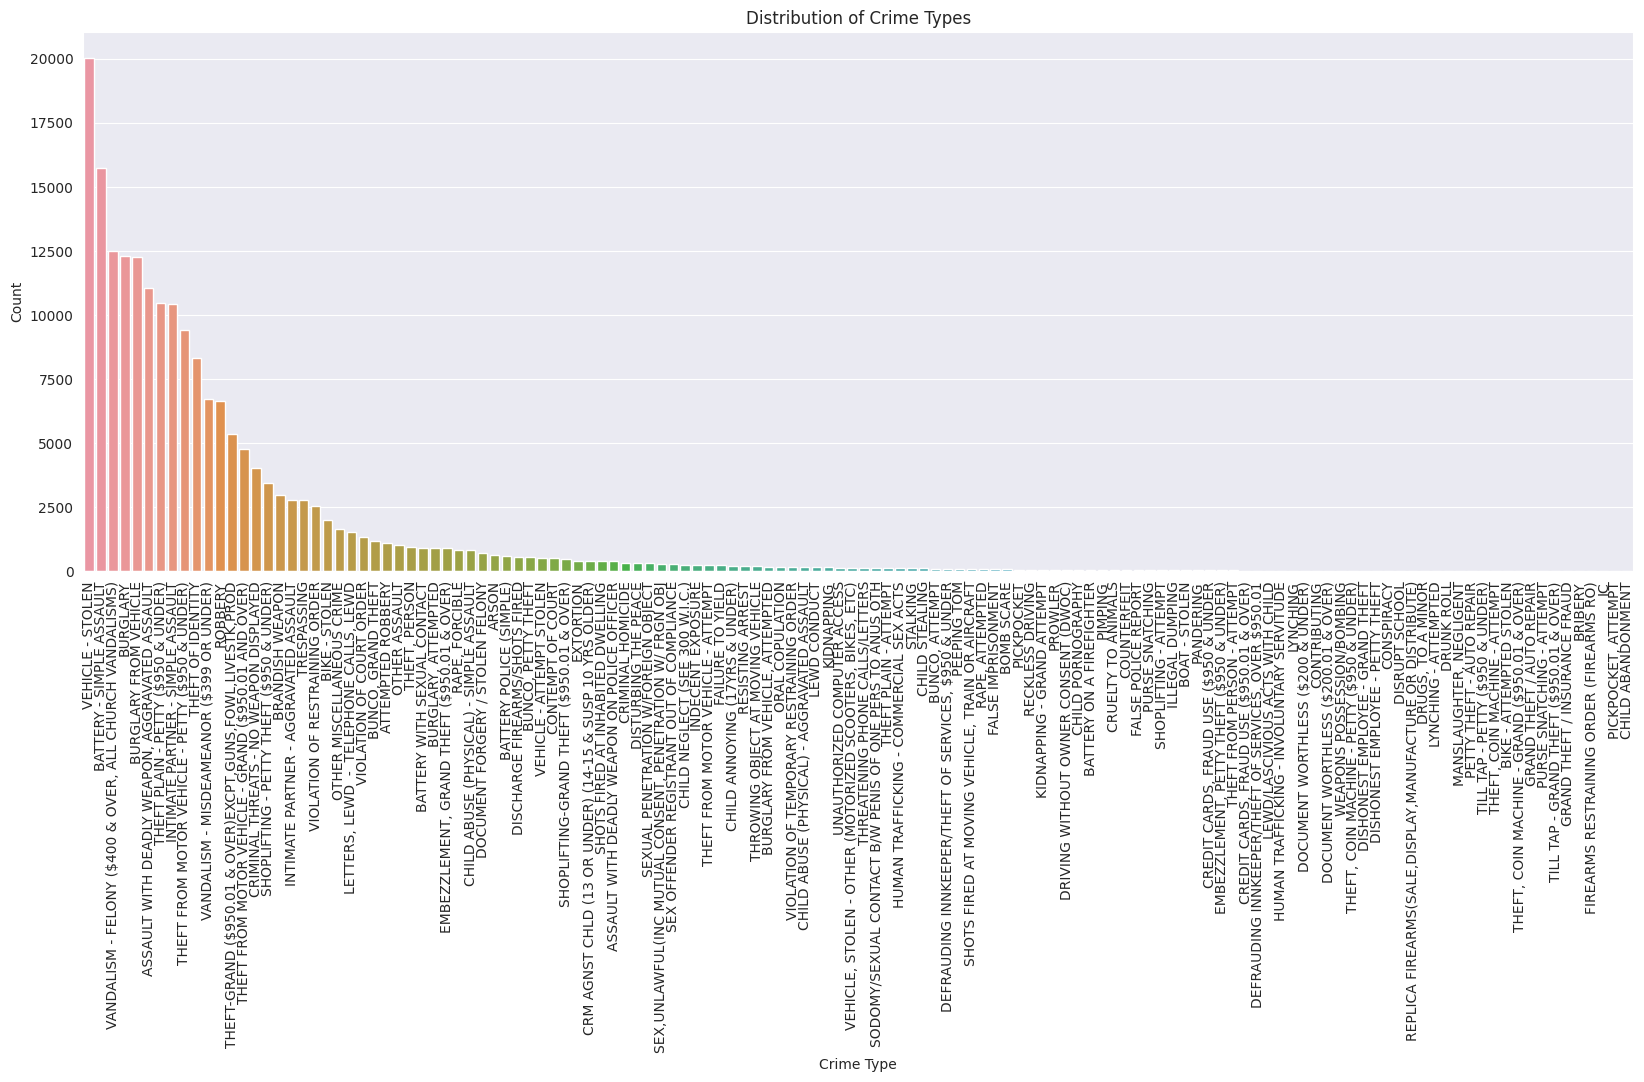

In [31]:
plt.figure(figsize=(20, 7))
sns.countplot(data=crime_data, x='Crm Cd Desc', order=crime_data['Crm Cd Desc'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.swarmplot(x ='Vict Sex', y ='Weapon Used Cd', data = crime_data.reset_index())

In [33]:
sns.swarmplot(x ='Vict Sex', y ='Vict Age', data = crime_data)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7ee2548fd090> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
crime_place = crime_data.groupby(by=['Crm Cd Desc','AREA NAME']).count()['Status Desc'].unstack()
crime_place.head()

In [ ]:
sns.barplot(y ='Crm Cd Des', data =  crime_data.reset_index(),
			palette ='plasma')

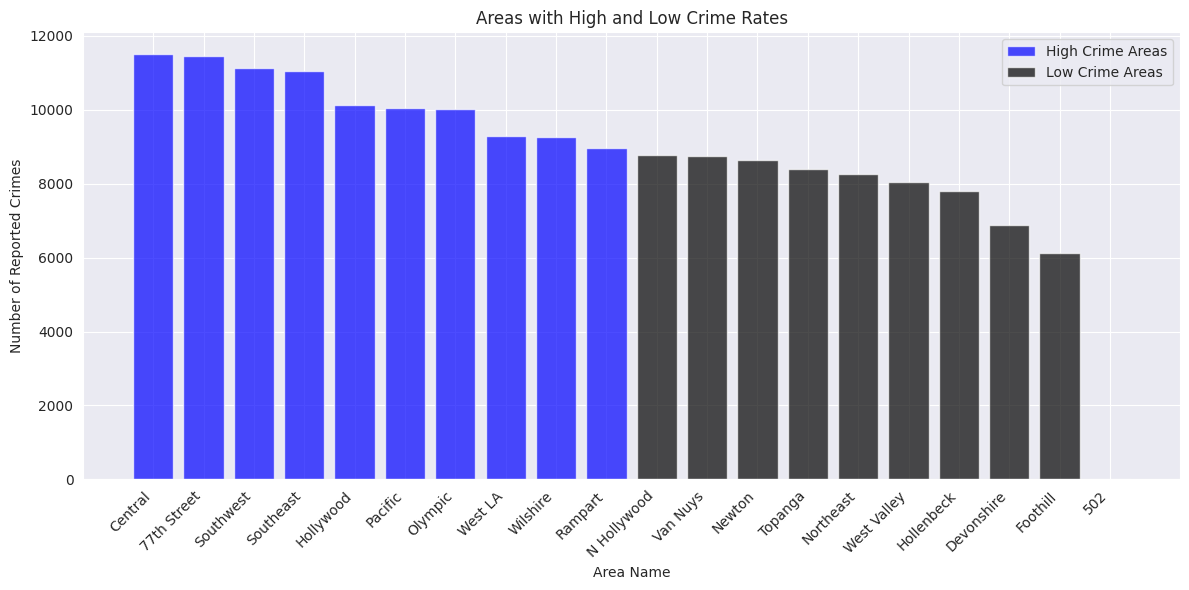

In [36]:
crime_by_area = crime_data['AREA NAME'].value_counts()
crime_by_area = crime_by_area.sort_values(ascending=False)
top_10_areas = crime_by_area.head(10)
bottom_10_areas = crime_by_area.tail(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_areas.index, top_10_areas.values, color='blue', alpha=0.7, label='High Crime Areas')
plt.bar(bottom_10_areas.index, bottom_10_areas.values, color='black', alpha=0.7, label='Low Crime Areas')
plt.xlabel('Area Name')
plt.ylabel('Number of Reported Crimes')
plt.title('Areas with High and Low Crime Rates')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
crime_data['LAT'] = pd.to_numeric(crime_data['LAT'])
crime_data['LON'] = pd.to_numeric(crime_data['LON'])

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(crime_data, geometry=gpd.points_from_xy(crime_data.LON, crime_data.LAT))

# Create a simple base map using Folium with a local tileset
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10, tiles='openstreetmap')

# Use FastMarkerCluster for better performance
FastMarkerCluster(data=list(zip(gdf['LAT'], gdf['LON']))).add_to(m)

# Save the map as an HTML file
m.save('crime_hotspots_map.html')

# Display the map
m